In [1]:
# Importing the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

from scipy import stats

# 1. Dataset Loading and Initial Exploration

## Dataset loading

In [4]:
PATH = 'D:/github/nids2/dataset'

# List to store DataFrames
dfs = []
# Load the datasets
for dirname, _, filenames in os.walk(PATH):
	for filename in filenames:
		dfs.append(pd.read_csv(os.path.join(dirname, filename)))
		
# Data dimensions of each individual dataset
for i, data in enumerate(dfs, start=1):
	rows, cols = data.shape
	print(f'df{i} -> {rows} rows, {cols} columns')

df1 -> 191033 rows, 79 columns
df2 -> 225745 rows, 79 columns
df3 -> 286467 rows, 79 columns
df4 -> 529918 rows, 79 columns
df5 -> 288602 rows, 79 columns
df6 -> 170366 rows, 79 columns
df7 -> 692703 rows, 79 columns


## Dataset Merging

In [5]:
# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dfs, axis=0, ignore_index=True)

for df in dfs: del df

## Initital exploration

### Printing all columns

In [15]:
print(data.columns)
print(data[' Label'].unique())

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

- There are a total of 79 columnns
- 'Label' label columns contains  13 values (12 attack type and 1 benign)
- The column names have leading whitespace which will be cleaned later

### Printing histogram to show counts for every Label values

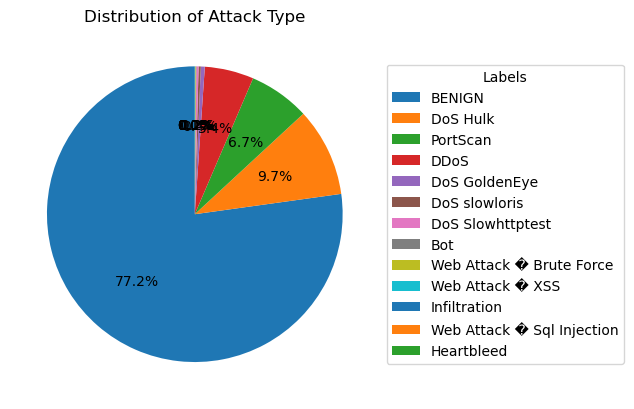

In [20]:
counts = data[' Label'].value_counts()

wedges, texts, autotexts = plt.pie(
    counts, autopct='%1.1f%%', startangle=90
)

# Add legend for each label with colors
plt.legend(
    wedges, counts.index,
    title="Labels",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)  # place legend outside chart
)

plt.title("Distribution of Attack Type")
plt.show()

- Majority of Attack type is Benign

In [23]:
missing_value = data.isna().sum()
print(missing_value.loc[missing_value > 0])

Flow Bytes/s    1157
dtype: int64


In [ ]:
# Dropping missing values
data = data.dropna()
print(f'Dataset shape after row-wise removal: {data.shape}')
Dataset shape after row-wise removal: (2520798, 67)